# Who Painted the Painting?
> A assignment concentrating on finding the missing painter on a known piece of art.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter, assignment]
- image: images/chart-preview.png

In [1]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
import torch
torch.cuda.empty_cache()

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/artists.csv')
names = df[['name']]

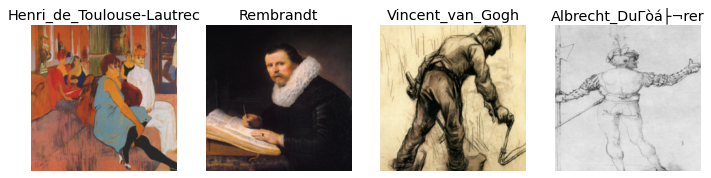

In [5]:
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5)
)

dls = images.dataloaders(Path('data/images'), num_workers=0)
dls.valid.show_batch(max_n=4, nrows=1)

In [6]:
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.659816,1.660063,0.436146,03:21


epoch,train_loss,valid_loss,error_rate,time
0,1.514944,1.270798,0.351767,03:36
1,1.118307,1.037294,0.291334,03:36
2,0.638050,0.867441,0.268529,03:32
3,0.396811,0.846549,0.269099,03:34


In [7]:
pred,pred_idx,probs = learn.predict("data/test.jpg")

In [8]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred



Label(value='Prediction: Rembrandt; Probability: 0.3502')